Data reading

In [1]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

#Used to generate graphs inside the notebook
%matplotlib inline 

#Specify the path to data 
PathToData='/content/drive/My Drive/Sem8/DS/Project/Consolidated (Educational Dataset).csv'

#Read data
data = pd.read_csv(PathToData)

#Displaying starting rows
print(data.head())

  % Boys Enrolled  % Complete Primary Schools  ... Total number of schools  Year
0          54.77%                    0.936599  ...                     601  2013
1          62.50%                    0.594203  ...                     595  2013
2          86.63%                    0.939068  ...                     379  2013
3          60.77%                    0.827225  ...                     262  2013
4          60.75%                    0.592348  ...                    1036  2013

[5 rows x 51 columns]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Getting basic statistics about dataset

In [2]:
print(data.shape)

(580, 51)


Our data contains 580 record of different schools and 51 features about each school

In [3]:
print(data.describe())

       % Complete Primary Schools  ...         Year
count                  576.000000  ...   580.000000
mean                     0.592544  ...  2014.500000
std                      0.302878  ...     1.118999
min                      0.000000  ...  2013.000000
25%                      0.340517  ...  2013.750000
50%                      0.691613  ...  2014.500000
75%                      0.846848  ...  2015.250000
max                      0.994764  ...  2016.000000

[8 rows x 33 columns]


Printing the datatypes of columns(Features)

In [4]:
print(data.dtypes)

% Boys Enrolled                                                                          object
% Complete Primary Schools                                                              float64
% Girls Enrolled                                                                         object
% Primary Schools with single classroom                                                 float64
% Primary Schools with single teacher                                                   float64
All Four Facilities                                                                      object
Any One Facility                                                                         object
Any Three Facilities                                                                     object
Any Two Facilities                                                                       object
Area (km²)                                                                              float64
Bomb Blasts Occurred                    

Getting to know about the different types of columns in the dataset

In [5]:
print(data.dtypes.unique())

[dtype('O') dtype('float64') dtype('int64')]


Dataset contains three different types of columns:


1.   Object
2.   Float64
3.   int64



**Exploring the dataset**

Exploring null columns

Printing the count of Null values in columns

In [6]:
null_columns=data.columns[data.isnull().any()]
print(data[null_columns].isnull().sum())

% Boys Enrolled                             1
% Complete Primary Schools                  4
% Girls Enrolled                            1
% Primary Schools with single classroom     4
% Primary Schools with single teacher       4
All Four Facilities                         4
Any One Facility                            4
Any Three Facilities                        4
Any Two Facilities                          4
Area (km²)                                 68
Complete Primary Schools                    4
No Facility                                 4
Population                                 68
Primary Schools with single classroom       4
Primary Schools with single teacher         4
dtype: int64


Missing value count of original dataset
1. % Boys Enrolled                             1
2. % Complete Primary Schools                  4
3. % Girls Enrolled                            1
4. % Primary Schools with single classroom     4
5. % Primary Schools with single teacher       4
6. All Four Facilities                         4
7. Any One Facility                            4
8. Any Three Facilities                        4
9. Any Two Facilities                          4
10. Area (km²)                                 68
11. Complete Primary Schools                    4
12. No Facility                                 4
13. Population                                 68
14. Primary Schools with single classroom       4
15. Primary Schools with single teacher         4

As there are a total of 580 values, above statistics represent that there are very less Null values. It means we wont be dropping any column because of null values. We will focus on imputing values in the null rows

Following are the columns containing some null values

In [7]:
data[data.isnull().any(axis=1)][null_columns].head()

,% Boys Enrolled,% Complete Primary Schools,% Girls Enrolled,% Primary Schools with single classroom,% Primary Schools with single teacher,All Four Facilities,Any One Facility,Any Three Facilities,Any Two Facilities,Area (km²),Complete Primary Schools,No Facility,Population,Primary Schools with single classroom,Primary Schools with single teacher
2,86.63%,0.939068,13.37%,0.021505,0.039427,5.35%,4.55%,16.31%,20.05%,NaN,262.0,53.74%,NaN,6.0,11.0
7,80.78%,0.737327,19.22%,0.184332,0.078341,4.08%,25.31%,13.47%,21.22%,NaN,160.0,35.92%,NaN,40.0,17.0
40,94.20%,0.908560,5.80%,0.007782,0.083658,17.45%,23.83%,13.26%,20.97%,NaN,467.0,24.50%,NaN,4.0,43.0
42,100.00%,0.886364,0.00%,0.015152,0.098485,15.79%,26.97%,11.84%,18.42%,NaN,117.0,26.97%,NaN,2.0,13.0
43,100.00%,0.945578,0.00%,0.020408,0.034014,15.68%,28.11%,18.38%,21.08%,NaN,139.0,16.76%,NaN,3.0,5.0


A problem would generate if we start the Imputing process now because many columns contain the % sign which would have to be removed first. The problem is that they might also have Nan values and converting from string to float would generate error. So:
 1. first we will impute 0 in the place of all the Nan values. 
 2. Will remove the percent signs and convert those columns into float
 3. will replace the 0's with knn imputer values

In [8]:
data=data.fillna(0)
data.head(3)# checking only 3 because Area contained Nan in the 3rd row which has now been replaced with 0

,% Boys Enrolled,% Complete Primary Schools,% Girls Enrolled,% Primary Schools with single classroom,% Primary Schools with single teacher,All Four Facilities,Any One Facility,Any Three Facilities,Any Two Facilities,Area (km²),Bomb Blasts Occurred,"Boundary wall, Building condition satisfactory, Drinking water and 2 more (clusters)",Boundary wall,Building condition satisfactory,MeasureGroup 1 Measures,Color By Measure Value,Show Sheet,Table of Contents,Other Factors Measure Value,Analysis Level Selector,Color By Measure Name,Complete Primary Schools,Country,City,Drinking water,Drone attacks in Pakistan,Education score,Educational Budget Spend of GDP,Electricity,Enrolment score,Gender parity score,Global Terrorism Index - Pakistan,Learning score,MeasureGroup 2 Measures,No Facility,Number of Records,Number of primary schools as % of total schools,Number of primary schools,Number of secondary schools as % of total schools,Number of secondary schools,Pakistan Economic Growth,Population,Primary Schools with single classroom,Primary Schools with single teacher,Province,Retention score,School infrastructure score,Terrorist Attacks Affectees,Toilet,Total number of schools,Year
0,54.77%,0.936599,45.23%,0.034582,0.028818,17.06%,16.20%,24.73%,24.95%,768.0,41,Cluster 1,15.580737,30.028329,95.226372,95.226372,Year on Year Change,What are these scores? How they are Derived?,"5,379.0",AJK,Gender parity score,325.0,Pakistan,Bagh,30.878187,24,64.894093,2.59%,10.764873,81.750000,95.226372,9.07,67.8,64.894093,17.06%,1,0.577371,347,0.422629,254,3.70%,351415.0,12.0,10.0,AJK,14.8,24.929178,5379,37.393768,601,2013
1,62.50%,0.594203,37.50%,0.359903,0.045894,15.25%,20.21%,17.38%,15.43%,1516.0,41,Cluster 1,25.284738,48.519362,87.501106,87.501106,Year on Year Change,What are these scores? How they are Derived?,"5,379.0",AJK,Gender parity score,246.0,Pakistan,Bhimber,30.523918,24,74.483610,2.59%,19.362187,80.333333,87.501106,9.07,54.9,74.483610,31.74%,1,0.695798,414,0.304202,181,3.70%,301633.0,149.0,19.0,AJK,75.2,28.883827,5379,20.728929,595,2013
2,86.63%,0.939068,13.37%,0.021505,0.039427,5.35%,4.55%,16.31%,20.05%,0.0,41,Cluster 1,7.971014,13.768116,63.366337,63.366337,Year on Year Change,What are these scores? How they are Derived?,"5,379.0",AJK,Gender parity score,262.0,Pakistan,Hattian,39.130435,24,47.579084,2.59%,7.608696,78.750000,63.366337,9.07,48.2,47.579084,53.74%,1,0.736148,279,0.263852,100,3.70%,0.0,6.0,11.0,AJK,0.0,22.463768,5379,43.840580,379,2013


By exploring the dataset, I found some columns that in my observation doesnt seem to be useful. So we will be dropping those columns

In [9]:
dropColumns=['Boundary wall, Building condition satisfactory, Drinking water and 2 more (clusters)','Show Sheet','Table of Contents','Color By Measure Name','Number of Records'
             ,'MeasureGroup 1 Measures','Color By Measure Value','Other Factors Measure Value','MeasureGroup 2 Measures','Country','Analysis Level Selector']

#Analysis Level Selector is removed because it is same as province

## Drop was not working due to an issue in data formatting
#data.drop(dropColumns, axis=1,inplace=True)

#Alternative to drop is to select other than the columns we want to drop
columns=[col for col in data.columns if col not in dropColumns]

#Columns that were selected
print(columns)

#Displaying the data
data=data[columns]
data



['% Boys Enrolled', '% Complete Primary Schools', '% Girls Enrolled', '% Primary Schools with single classroom', '% Primary Schools with single teacher', 'All Four Facilities', 'Any One Facility', 'Any Three Facilities', 'Any Two Facilities', 'Area (km²)', 'Bomb Blasts Occurred', 'Boundary wall', 'Building condition satisfactory', 'Complete Primary Schools', 'City', 'Drinking water', 'Drone attacks in Pakistan', 'Education score', 'Educational Budget Spend of GDP', 'Electricity', 'Enrolment score', 'Gender parity score', 'Global Terrorism Index - Pakistan', 'Learning score', 'No Facility', 'Number of primary schools as % of total schools', 'Number of primary schools', 'Number of secondary schools as % of total schools', 'Number of secondary schools', 'Pakistan Economic Growth', 'Population', 'Primary Schools with single classroom', 'Primary Schools with single teacher', 'Province', 'Retention score', 'School infrastructure score', 'Terrorist Attacks Affectees', 'Toilet', 'Total number 

,% Boys Enrolled,% Complete Primary Schools,% Girls Enrolled,% Primary Schools with single classroom,% Primary Schools with single teacher,All Four Facilities,Any One Facility,Any Three Facilities,Any Two Facilities,Area (km²),Bomb Blasts Occurred,Boundary wall,Building condition satisfactory,Complete Primary Schools,City,Drinking water,Drone attacks in Pakistan,Education score,Educational Budget Spend of GDP,Electricity,Enrolment score,Gender parity score,Global Terrorism Index - Pakistan,Learning score,No Facility,Number of primary schools as % of total schools,Number of primary schools,Number of secondary schools as % of total schools,Number of secondary schools,Pakistan Economic Growth,Population,Primary Schools with single classroom,Primary Schools with single teacher,Province,Retention score,School infrastructure score,Terrorist Attacks Affectees,Toilet,Total number of schools,Year
0,54.77%,0.936599,45.23%,0.034582,0.028818,17.06%,16.20%,24.73%,24.95%,768.0,41,15.580737,30.028329,325.0,Bagh,30.878187,24,64.894093,2.59%,10.764873,81.750000,95.226372,9.07,67.800000,17.06%,0.577371,347,0.422629,254,3.70%,351415.0,12.0,10.0,AJK,14.800000,24.929178,5379,37.393768,601,2013
1,62.50%,0.594203,37.50%,0.359903,0.045894,15.25%,20.21%,17.38%,15.43%,1516.0,41,25.284738,48.519362,246.0,Bhimber,30.523918,24,74.483610,2.59%,19.362187,80.333333,87.501106,9.07,54.900000,31.74%,0.695798,414,0.304202,181,3.70%,301633.0,149.0,19.0,AJK,75.200000,28.883827,5379,20.728929,595,2013
2,86.63%,0.939068,13.37%,0.021505,0.039427,5.35%,4.55%,16.31%,20.05%,0.0,41,7.971014,13.768116,262.0,Hattian,39.130435,24,47.579084,2.59%,7.608696,78.750000,63.366337,9.07,48.200000,53.74%,0.736148,279,0.263852,100,3.70%,0.0,6.0,11.0,AJK,0.000000,22.463768,5379,43.840580,379,2013
3,60.77%,0.827225,39.23%,0.041885,0.130890,1.57%,22.44%,7.09%,12.20%,600.0,41,3.208556,6.417112,158.0,Haveli,27.807487,24,53.021042,2.59%,1.604278,80.750000,89.234168,9.07,42.100000,56.69%,0.729008,191,0.270992,71,3.70%,150000.0,8.0,25.0,AJK,0.000000,13.048128,5379,26.203209,262,2013
4,60.75%,0.592348,39.25%,0.346966,0.060686,7.12%,23.06%,9.78%,13.60%,2162.0,41,11.330698,47.167325,449.0,Kotli,17.127800,24,69.428395,2.59%,10.408432,78.833333,89.246914,9.07,36.433333,46.44%,0.731660,758,0.268340,278,3.70%,834094.0,263.0,46.0,AJK,73.200000,20.184453,5379,14.888011,1036,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,63.98%,0.214286,36.02%,0.215633,0.570081,31.77%,12.64%,23.71%,20.58%,5165.0,16,77.358491,30.323450,159.0,Tando Allah Yar,50.539084,3,56.740249,2.20%,56.199461,46.713701,86.022294,8.61,35.225000,11.31%,0.892900,742,0.107100,89,4.70%,908373.0,160.0,423.0,Sindh,59.000000,55.390836,1803,62.533693,831,2016
576,73.89%,0.000000,26.11%,0.440000,0.743158,14.16%,22.81%,25.17%,19.08%,2310.0,16,59.473684,31.052632,0.0,Tando Muhammad Khan,53.368421,3,48.572540,2.20%,20.210526,35.283098,76.114923,8.61,39.223474,18.78%,0.934120,950,0.065880,67,4.70%,550000.0,418.0,706.0,Sindh,43.668667,43.010526,1803,50.947368,1017,2016
577,75.73%,0.024200,24.27%,0.417585,0.558215,2.10%,15.12%,10.10%,19.79%,19638.0,16,37.402528,41.462759,90.0,Tharparkar,14.896478,3,46.699360,2.20%,3.576230,54.232323,74.265118,8.61,32.300000,52.89%,0.927894,3719,0.072106,289,4.70%,955812.0,1553.0,2076.0,Sindh,26.000000,26.071525,1803,33.019629,4008,2016
578,71.06%,0.018284,28.94%,0.514768,0.466948,2.71%,22.57%,4.82%,25.48%,19638.0,16,45.921238,10.056259,26.0,Thatta,5.907173,3,42.231505,2.20%,1.828411,37.217551,78.935989,8.61,34.772481,44.42%,0.938614,1422,0.061386,93,4.70%,914291.0,732.0,664.0,Sindh,18.000000,19.774965,1803,35.161744,1515,2016



 1. We will find the non numerical columns
 2. Among those columns we will explore the columns containing '%' sign
 3. Will remove the '%' sign and divide by 100
 4. Once this cleaning is done, we would replace the 0's with Nan and will impute missing values

1)Finding non numerical columns

In [10]:
data2 = data.copy()
NonNumerical=[c for c in data.columns if data[c].dtype in ['O']]

print(NonNumerical)


['% Boys Enrolled', '% Girls Enrolled', 'All Four Facilities', 'Any One Facility', 'Any Three Facilities', 'Any Two Facilities', 'City', 'Educational Budget Spend of GDP', 'No Facility', 'Pakistan Economic Growth', 'Province']


In [0]:
for i in NonNumerical:# 2) iterate over non numerical columns

  # 3) removing % and dividing by 100
  if(data2[i][0][-1]=='%'):

    data2[i] = data2[i].map(lambda x: str(x)[:-1]) #Succssfully removes the percentage sign
    data2[i]=pd.to_numeric(data2[i],errors='coerce')
    # data2[i]=data2[i].astype('float64')##Gives error
    data2[i] = data2[i]/100

In [12]:
data = data2
print(data.head())

   % Boys Enrolled  % Complete Primary Schools  ...  Total number of schools  Year
0           0.5477                    0.936599  ...                      601  2013
1           0.6250                    0.594203  ...                      595  2013
2           0.8663                    0.939068  ...                      379  2013
3           0.6077                    0.827225  ...                      262  2013
4           0.6075                    0.592348  ...                     1036  2013

[5 rows x 40 columns]


'%' sign succesfully handled. Time to perform the imputation of missing values

Replace all the 0's with Nan

In [0]:
# data2=data.copy()

In [14]:
print(data.dtypes.unique())

[dtype('float64') dtype('int64') dtype('O')]


In [15]:
import numpy as np
data.replace(0, np.nan, inplace=True)
data.head()

,% Boys Enrolled,% Complete Primary Schools,% Girls Enrolled,% Primary Schools with single classroom,% Primary Schools with single teacher,All Four Facilities,Any One Facility,Any Three Facilities,Any Two Facilities,Area (km²),Bomb Blasts Occurred,Boundary wall,Building condition satisfactory,Complete Primary Schools,City,Drinking water,Drone attacks in Pakistan,Education score,Educational Budget Spend of GDP,Electricity,Enrolment score,Gender parity score,Global Terrorism Index - Pakistan,Learning score,No Facility,Number of primary schools as % of total schools,Number of primary schools,Number of secondary schools as % of total schools,Number of secondary schools,Pakistan Economic Growth,Population,Primary Schools with single classroom,Primary Schools with single teacher,Province,Retention score,School infrastructure score,Terrorist Attacks Affectees,Toilet,Total number of schools,Year
0,0.5477,0.936599,0.4523,0.034582,0.028818,0.1706,0.1620,0.2473,0.2495,768.0,41,15.580737,30.028329,325.0,Bagh,30.878187,24,64.894093,0.0259,10.764873,81.750000,95.226372,9.07,67.800000,0.1706,0.577371,347,0.422629,254,0.037,351415.0,12.0,10.0,AJK,14.8,24.929178,5379,37.393768,601,2013
1,0.6250,0.594203,0.3750,0.359903,0.045894,0.1525,0.2021,0.1738,0.1543,1516.0,41,25.284738,48.519362,246.0,Bhimber,30.523918,24,74.483610,0.0259,19.362187,80.333333,87.501106,9.07,54.900000,0.3174,0.695798,414,0.304202,181,0.037,301633.0,149.0,19.0,AJK,75.2,28.883827,5379,20.728929,595,2013
2,0.8663,0.939068,0.1337,0.021505,0.039427,0.0535,0.0455,0.1631,0.2005,NaN,41,7.971014,13.768116,262.0,Hattian,39.130435,24,47.579084,0.0259,7.608696,78.750000,63.366337,9.07,48.200000,0.5374,0.736148,279,0.263852,100,0.037,NaN,6.0,11.0,AJK,NaN,22.463768,5379,43.840580,379,2013
3,0.6077,0.827225,0.3923,0.041885,0.130890,0.0157,0.2244,0.0709,0.1220,600.0,41,3.208556,6.417112,158.0,Haveli,27.807487,24,53.021042,0.0259,1.604278,80.750000,89.234168,9.07,42.100000,0.5669,0.729008,191,0.270992,71,0.037,150000.0,8.0,25.0,AJK,NaN,13.048128,5379,26.203209,262,2013
4,0.6075,0.592348,0.3925,0.346966,0.060686,0.0712,0.2306,0.0978,0.1360,2162.0,41,11.330698,47.167325,449.0,Kotli,17.127800,24,69.428395,0.0259,10.408432,78.833333,89.246914,9.07,36.433333,0.4644,0.731660,758,0.268340,278,0.037,834094.0,263.0,46.0,AJK,73.2,20.184453,5379,14.888011,1036,2013


In [16]:
null_columns=data.columns[data.isnull().any()]
print(data[null_columns].isnull().sum())

% Boys Enrolled                              1
% Complete Primary Schools                  32
% Girls Enrolled                            36
% Primary Schools with single classroom     24
% Primary Schools with single teacher        8
All Four Facilities                          4
Any One Facility                           152
Any Three Facilities                         4
Any Two Facilities                         144
Area (km²)                                  88
Boundary wall                                3
Building condition satisfactory              4
Complete Primary Schools                    32
Drinking water                               2
Electricity                                  1
Enrolment score                             10
Gender parity score                          1
Learning score                              10
No Facility                                272
Population                                  88
Primary Schools with single classroom       24
Primary Schoo

Impute values in columns other than the columns contatning categorical data. Removing the no facility column as it contains many null values

In [17]:
Numerical=[c for c in data.columns if data[c].dtype not in ['O','object']]
Numerical = [c for c in Numerical if c not in ['No Facility'] ]
print(Numerical)


['% Boys Enrolled', '% Complete Primary Schools', '% Girls Enrolled', '% Primary Schools with single classroom', '% Primary Schools with single teacher', 'All Four Facilities', 'Any One Facility', 'Any Three Facilities', 'Any Two Facilities', 'Area (km²)', 'Bomb Blasts Occurred', 'Boundary wall', 'Building condition satisfactory', 'Complete Primary Schools', 'Drinking water', 'Drone attacks in Pakistan', 'Education score', 'Educational Budget Spend of GDP', 'Electricity', 'Enrolment score', 'Gender parity score', 'Global Terrorism Index - Pakistan', 'Learning score', 'Number of primary schools as % of total schools', 'Number of primary schools', 'Number of secondary schools as % of total schools', 'Number of secondary schools', 'Pakistan Economic Growth', 'Population', 'Primary Schools with single classroom', 'Primary Schools with single teacher', 'Retention score', 'School infrastructure score', 'Terrorist Attacks Affectees', 'Toilet', 'Total number of schools', 'Year']


In [18]:
print(data[Numerical].dtypes.unique())

[dtype('float64') dtype('int64')]


In [0]:
# data2= data.copy()#Copy of datamade
# data=data2.copy()

In [20]:
data[Numerical]

,% Boys Enrolled,% Complete Primary Schools,% Girls Enrolled,% Primary Schools with single classroom,% Primary Schools with single teacher,All Four Facilities,Any One Facility,Any Three Facilities,Any Two Facilities,Area (km²),Bomb Blasts Occurred,Boundary wall,Building condition satisfactory,Complete Primary Schools,Drinking water,Drone attacks in Pakistan,Education score,Educational Budget Spend of GDP,Electricity,Enrolment score,Gender parity score,Global Terrorism Index - Pakistan,Learning score,Number of primary schools as % of total schools,Number of primary schools,Number of secondary schools as % of total schools,Number of secondary schools,Pakistan Economic Growth,Population,Primary Schools with single classroom,Primary Schools with single teacher,Retention score,School infrastructure score,Terrorist Attacks Affectees,Toilet,Total number of schools,Year
0,0.5477,0.936599,0.4523,0.034582,0.028818,0.1706,0.1620,0.2473,0.2495,768.0,41,15.580737,30.028329,325.0,30.878187,24,64.894093,0.0259,10.764873,81.750000,95.226372,9.07,67.800000,0.577371,347,0.422629,254,0.037,351415.0,12.0,10.0,14.800000,24.929178,5379,37.393768,601,2013
1,0.6250,0.594203,0.3750,0.359903,0.045894,0.1525,0.2021,0.1738,0.1543,1516.0,41,25.284738,48.519362,246.0,30.523918,24,74.483610,0.0259,19.362187,80.333333,87.501106,9.07,54.900000,0.695798,414,0.304202,181,0.037,301633.0,149.0,19.0,75.200000,28.883827,5379,20.728929,595,2013
2,0.8663,0.939068,0.1337,0.021505,0.039427,0.0535,0.0455,0.1631,0.2005,NaN,41,7.971014,13.768116,262.0,39.130435,24,47.579084,0.0259,7.608696,78.750000,63.366337,9.07,48.200000,0.736148,279,0.263852,100,0.037,NaN,6.0,11.0,NaN,22.463768,5379,43.840580,379,2013
3,0.6077,0.827225,0.3923,0.041885,0.130890,0.0157,0.2244,0.0709,0.1220,600.0,41,3.208556,6.417112,158.0,27.807487,24,53.021042,0.0259,1.604278,80.750000,89.234168,9.07,42.100000,0.729008,191,0.270992,71,0.037,150000.0,8.0,25.0,NaN,13.048128,5379,26.203209,262,2013
4,0.6075,0.592348,0.3925,0.346966,0.060686,0.0712,0.2306,0.0978,0.1360,2162.0,41,11.330698,47.167325,449.0,17.127800,24,69.428395,0.0259,10.408432,78.833333,89.246914,9.07,36.433333,0.731660,758,0.268340,278,0.037,834094.0,263.0,46.0,73.200000,20.184453,5379,14.888011,1036,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,0.6398,0.214286,0.3602,0.215633,0.570081,0.3177,0.1264,0.2371,0.2058,5165.0,16,77.358491,30.323450,159.0,50.539084,3,56.740249,0.0220,56.199461,46.713701,86.022294,8.61,35.225000,0.892900,742,0.107100,89,0.047,908373.0,160.0,423.0,59.000000,55.390836,1803,62.533693,831,2016
576,0.7389,NaN,0.2611,0.440000,0.743158,0.1416,0.2281,0.2517,0.1908,2310.0,16,59.473684,31.052632,NaN,53.368421,3,48.572540,0.0220,20.210526,35.283098,76.114923,8.61,39.223474,0.934120,950,0.065880,67,0.047,550000.0,418.0,706.0,43.668667,43.010526,1803,50.947368,1017,2016
577,0.7573,0.024200,0.2427,0.417585,0.558215,0.0210,0.1512,0.1010,0.1979,19638.0,16,37.402528,41.462759,90.0,14.896478,3,46.699360,0.0220,3.576230,54.232323,74.265118,8.61,32.300000,0.927894,3719,0.072106,289,0.047,955812.0,1553.0,2076.0,26.000000,26.071525,1803,33.019629,4008,2016
578,0.7106,0.018284,0.2894,0.514768,0.466948,0.0271,0.2257,0.0482,0.2548,19638.0,16,45.921238,10.056259,26.0,5.907173,3,42.231505,0.0220,1.828411,37.217551,78.935989,8.61,34.772481,0.938614,1422,0.061386,93,0.047,914291.0,732.0,664.0,18.000000,19.774965,1803,35.161744,1515,2016


In [0]:
# data.to_csv (r'/content/drive/My Drive/Sem8/DS/Project/Processed(ContainsMissingValues).csv', index = False, header=True)

Imputing using ffill

In [22]:
data[Numerical]=data[Numerical].ffill(axis = 0) 
data[Numerical]

,% Boys Enrolled,% Complete Primary Schools,% Girls Enrolled,% Primary Schools with single classroom,% Primary Schools with single teacher,All Four Facilities,Any One Facility,Any Three Facilities,Any Two Facilities,Area (km²),Bomb Blasts Occurred,Boundary wall,Building condition satisfactory,Complete Primary Schools,Drinking water,Drone attacks in Pakistan,Education score,Educational Budget Spend of GDP,Electricity,Enrolment score,Gender parity score,Global Terrorism Index - Pakistan,Learning score,Number of primary schools as % of total schools,Number of primary schools,Number of secondary schools as % of total schools,Number of secondary schools,Pakistan Economic Growth,Population,Primary Schools with single classroom,Primary Schools with single teacher,Retention score,School infrastructure score,Terrorist Attacks Affectees,Toilet,Total number of schools,Year
0,0.5477,0.936599,0.4523,0.034582,0.028818,0.1706,0.1620,0.2473,0.2495,768.0,41,15.580737,30.028329,325.0,30.878187,24,64.894093,0.0259,10.764873,81.750000,95.226372,9.07,67.800000,0.577371,347,0.422629,254,0.037,351415.0,12.0,10.0,14.800000,24.929178,5379,37.393768,601,2013
1,0.6250,0.594203,0.3750,0.359903,0.045894,0.1525,0.2021,0.1738,0.1543,1516.0,41,25.284738,48.519362,246.0,30.523918,24,74.483610,0.0259,19.362187,80.333333,87.501106,9.07,54.900000,0.695798,414,0.304202,181,0.037,301633.0,149.0,19.0,75.200000,28.883827,5379,20.728929,595,2013
2,0.8663,0.939068,0.1337,0.021505,0.039427,0.0535,0.0455,0.1631,0.2005,1516.0,41,7.971014,13.768116,262.0,39.130435,24,47.579084,0.0259,7.608696,78.750000,63.366337,9.07,48.200000,0.736148,279,0.263852,100,0.037,301633.0,6.0,11.0,75.200000,22.463768,5379,43.840580,379,2013
3,0.6077,0.827225,0.3923,0.041885,0.130890,0.0157,0.2244,0.0709,0.1220,600.0,41,3.208556,6.417112,158.0,27.807487,24,53.021042,0.0259,1.604278,80.750000,89.234168,9.07,42.100000,0.729008,191,0.270992,71,0.037,150000.0,8.0,25.0,75.200000,13.048128,5379,26.203209,262,2013
4,0.6075,0.592348,0.3925,0.346966,0.060686,0.0712,0.2306,0.0978,0.1360,2162.0,41,11.330698,47.167325,449.0,17.127800,24,69.428395,0.0259,10.408432,78.833333,89.246914,9.07,36.433333,0.731660,758,0.268340,278,0.037,834094.0,263.0,46.0,73.200000,20.184453,5379,14.888011,1036,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,0.6398,0.214286,0.3602,0.215633,0.570081,0.3177,0.1264,0.2371,0.2058,5165.0,16,77.358491,30.323450,159.0,50.539084,3,56.740249,0.0220,56.199461,46.713701,86.022294,8.61,35.225000,0.892900,742,0.107100,89,0.047,908373.0,160.0,423.0,59.000000,55.390836,1803,62.533693,831,2016
576,0.7389,0.214286,0.2611,0.440000,0.743158,0.1416,0.2281,0.2517,0.1908,2310.0,16,59.473684,31.052632,159.0,53.368421,3,48.572540,0.0220,20.210526,35.283098,76.114923,8.61,39.223474,0.934120,950,0.065880,67,0.047,550000.0,418.0,706.0,43.668667,43.010526,1803,50.947368,1017,2016
577,0.7573,0.024200,0.2427,0.417585,0.558215,0.0210,0.1512,0.1010,0.1979,19638.0,16,37.402528,41.462759,90.0,14.896478,3,46.699360,0.0220,3.576230,54.232323,74.265118,8.61,32.300000,0.927894,3719,0.072106,289,0.047,955812.0,1553.0,2076.0,26.000000,26.071525,1803,33.019629,4008,2016
578,0.7106,0.018284,0.2894,0.514768,0.466948,0.0271,0.2257,0.0482,0.2548,19638.0,16,45.921238,10.056259,26.0,5.907173,3,42.231505,0.0220,1.828411,37.217551,78.935989,8.61,34.772481,0.938614,1422,0.061386,93,0.047,914291.0,732.0,664.0,18.000000,19.774965,1803,35.161744,1515,2016


Dropping the no facility column

In [0]:
# dropColumns=['Boundary wall, Building condition satisfactory, Drinking water and 2 more (clusters)','Show Sheet','Table of Contents','Color By Measure Name','Number of Records']
data = data[[c for c in data.columns if c not in ['No Facility']]]

Now the data contains no null values and we can start visualizing the data

I think its a good option to use because of the fact that inserts the closest value to the null position

Imputing mean

In [25]:
"""
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data[Numerical]=imp_mean.fit_transform(data[Numerical])
data[Numerical]
"""

"\nfrom sklearn.impute import SimpleImputer\nimp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')\ndata[Numerical]=imp_mean.fit_transform(data[Numerical])\ndata[Numerical]\n"

Imputing mean didnt seem to be a good option as the population seemed unrealistic

Imputing missing values using knn imputer

In [27]:
"""
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

data[Numerical] = imputer.fit_transform(data[Numerical])
data[Numerical]

"""



'\nfrom sklearn.impute import KNNImputer\n\nimputer = KNNImputer(n_neighbors=5)\n\ndata[Numerical] = imputer.fit_transform(data[Numerical])\ndata[Numerical]\n\n'

KNN imputer doesnt seem to be a suitable choice for the dataset, the dataset processed with it is saved in the directory

We have data from following cities

In [30]:
print('Cities belong to the following areas:\n\nAzad Jammu Kashmir(AJK), Balochistan, Federally Administered Tribal Areas(FATA),\nGilgit Baltistan(GB), Khyber Pakhtunkhwa(KP), Islamabd Capital Territory(ICT), Punjab, Sindh: ')
print(data.Province.unique())

print('\nData Collected of following cities:\n')
c=5
for i in data.City.unique():
  if(c==10):
    print()
    c=0
  print(i, end =", ")
  c+=1

Cities belong to the following areas:

Azad Jammu Kashmir(AJK), Balochistan, Federally Administered Tribal Areas(FATA),
Gilgit Baltistan(GB), Khyber Pakhtunkhwa(KP), Islamabd Capital Territory(ICT), Punjab, Sindh: 
['AJK' 'Balochistan' 'FATA' 'GB' 'ICT' 'KP' 'Punjab' 'Sindh']

Data Collected of following cities:

Bagh, Bhimber, Hattian, Haveli, Kotli, 
Mirpur, Muzaffarabad, Neelum, Poonch, Sudhnutti, Awaran, Barkhan, Chaghi, Dera Bugti, Gwadar, 
Harnai, Jaffarabad, Jhal Magsi, Kachhi, Kalat, Kech, Kharan, Khuzdar, Killa Abdullah, Killa Saifullah, 
Kohlu, Lasbela, Loralai, Mastung, Musakhail, Nasirabad, Nushki, Panjgur, Pishin, Quetta, 
Sherani, Sibi, Washuk, Zhob, Ziarat, Bajaur Agency, FR Bannu, FR DI Khan, FR Kohat, FR Lakki Marwat, 
FR Peshawar, FR Tank, Khyber Agency, Kurram Agency, Mohmand Agency, North Waziristan Agency, Orakzai Agency, South Waziristan Agency, Astor, Diamir, 
Ghanchi, Ghizer, Gilgit, Hunza Nagar, Skardu, Islamabad, Abbottabad, Bannu, Batagram, Buner, 
Charsadda,

**Visualizing insights**

Plotting correlation matrix

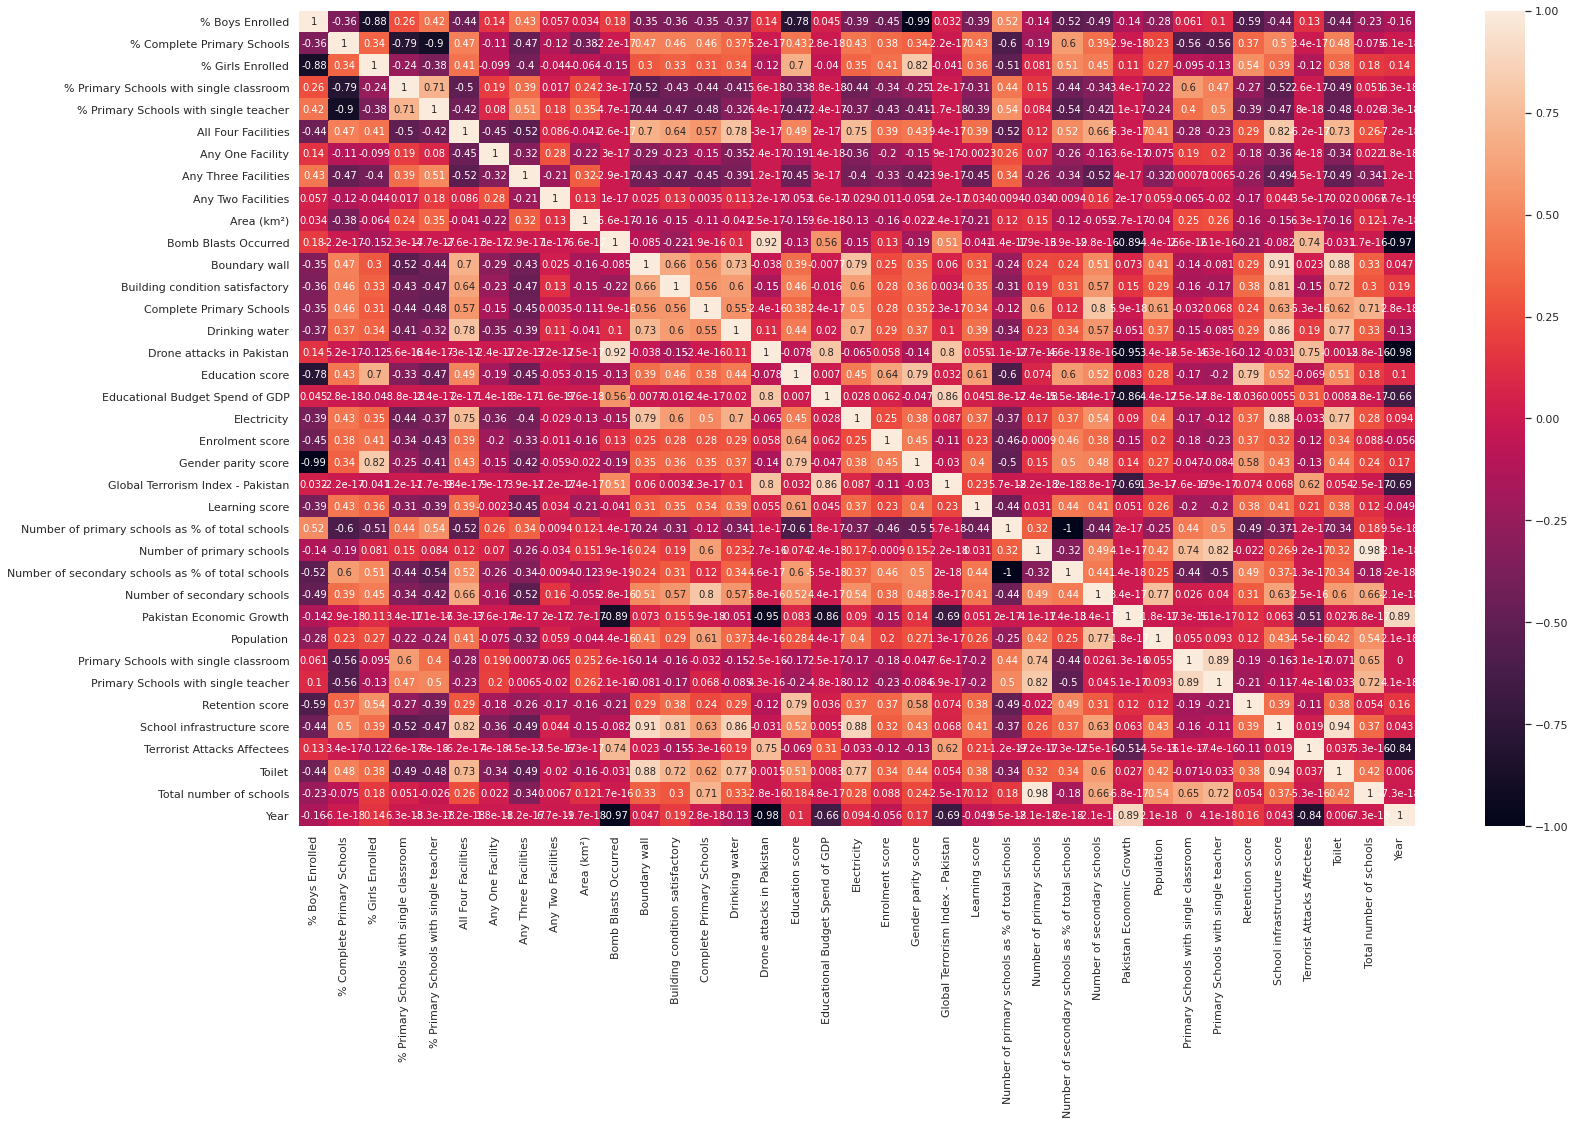

In [35]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(25,15))

corrMatrix = data.corr()
# print (corrMatrix)
sn.heatmap(corrMatrix, annot=True)
plt.show()

Due to large number of features, it is difficult to visualize the correlation matrix completely. Some observations that can be seen are:
1. Drone attacks have a high correlation with Educational Budget spend of GDP and Global Terrorism index
2.  Educational Budget spend of GDP has a high correlation with Global Terrorism index
3. Bomb blasts occurred has a high correlation with drone attacks rather than terrorism affectees 
4. An interesting fact can be seen is that retention score has low correlation with All 4 conditions, which points out to the fact that inspite of provision of good educational support, many children leave their education





Finding out numerical data distribution. 

Plotting the graphs help us visualizing which colummns are similar

In [36]:
df_num = data.select_dtypes(include = ['float64', 'int64'])# func to select particular type columns
print(df_num.head())

   % Boys Enrolled  % Complete Primary Schools  ...  Total number of schools  Year
0           0.5477                    0.936599  ...                      601  2013
1           0.6250                    0.594203  ...                      595  2013
2           0.8663                    0.939068  ...                      379  2013
3           0.6077                    0.827225  ...                      262  2013
4           0.6075                    0.592348  ...                     1036  2013

[5 rows x 37 columns]


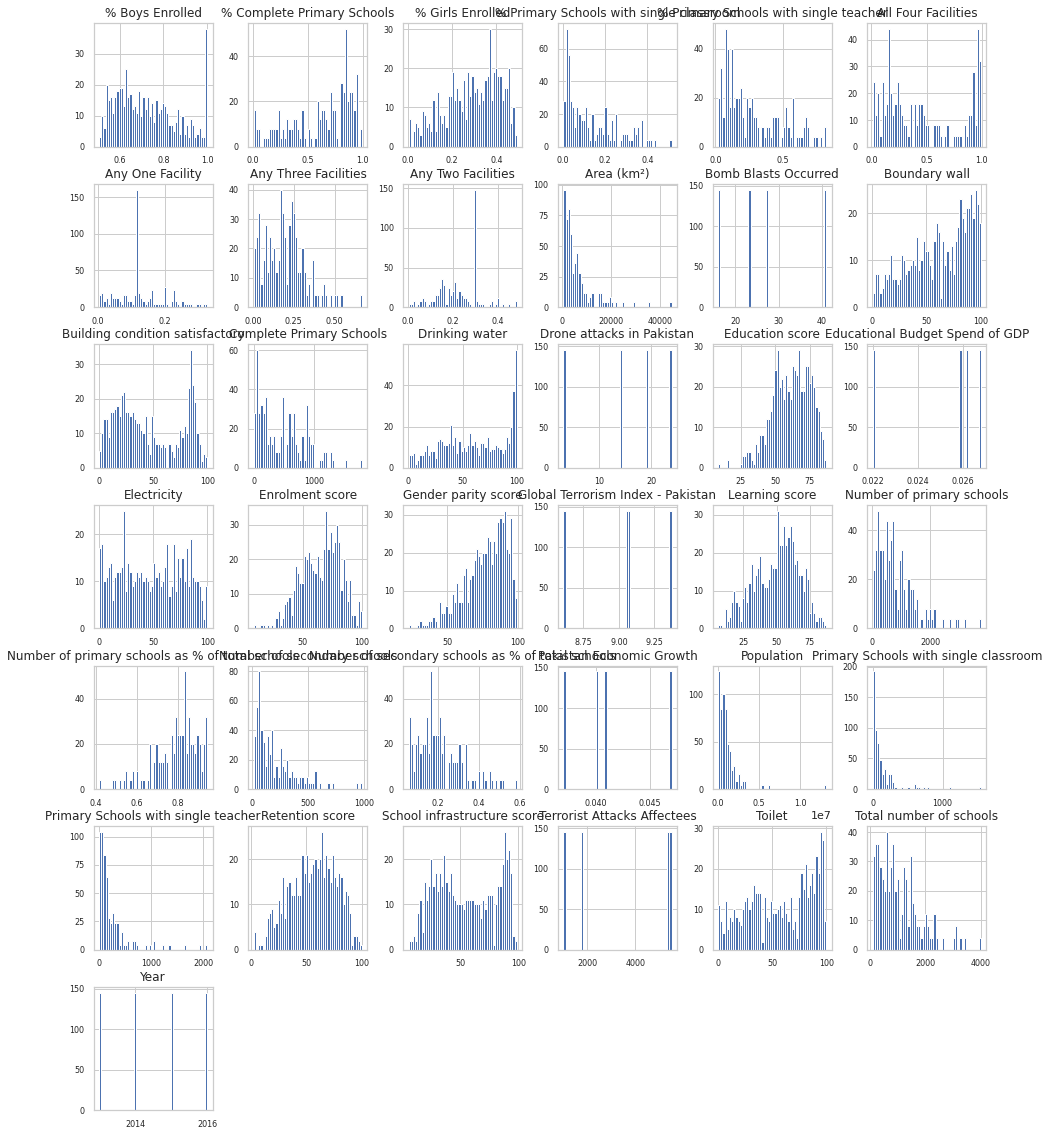

In [37]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

As can be observed from the above graphs, Retention score, Education Score, learning score, Enrolment score all have similar distribution which proves our above observation that retention score is linked to learning score.

Finding out the correlation of columns with Retention score to know how much these factors effect Retention score

Seperating the columns that have high correlation with retention score so as to know which factors contribute more

In [38]:
df_num_corr = df_num.corr()['Retention score'][:-1] # -1 to ignore the Retention score column
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)#Descending sort
print("{} features are strongly correlated with Retention score. They are:\n{}".format(len(golden_features_list), golden_features_list))

5 features are strongly correlated with Retention score. They are:
Retention score        1.000000
Education score        0.787578
Gender parity score    0.580401
% Girls Enrolled       0.536915
% Boys Enrolled       -0.586845
Name: Retention score, dtype: float64


Education score has a high correlation with retention score
The remaining 4 columns above has a moderate correlation with retention score

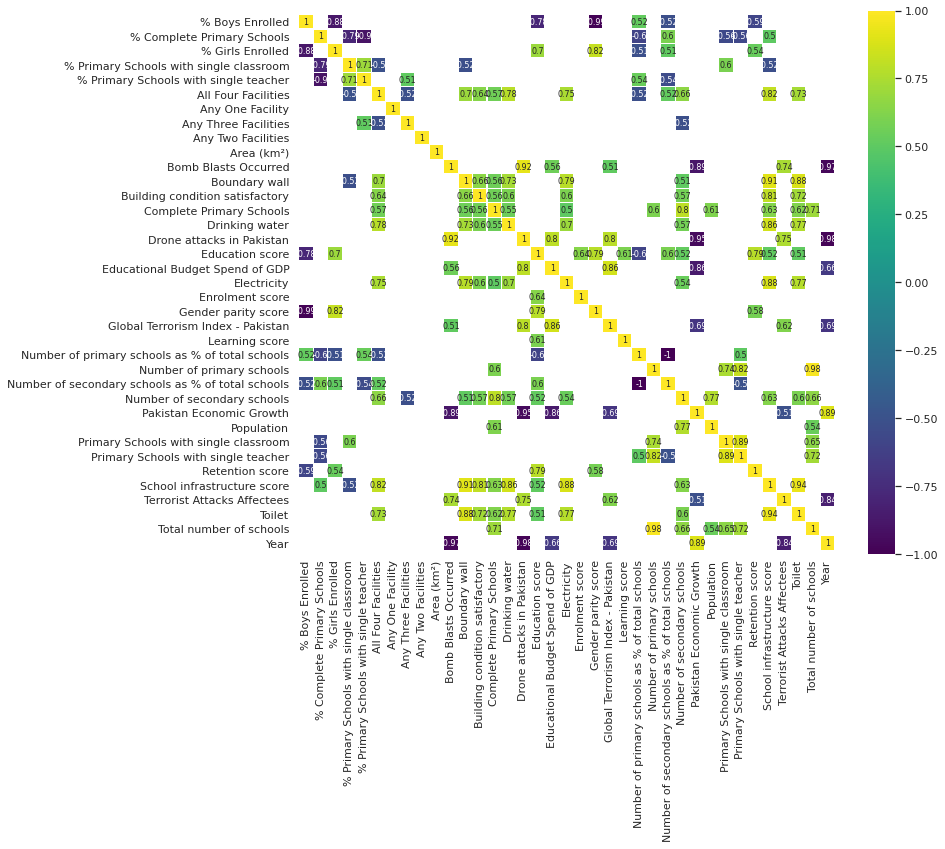

In [39]:
corr = df_num.corr() # Finding correlations among columns after dropping saleprice
plt.figure(figsize=(12, 10))#adjusting image size

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

1. A highly negative correlation can be observed among % Boys enrolled and % Girls enrolled which is an interesting observation. It might be due to the cultural values that parents prefer such schools for their daughters where the number of female are greater as compared to boys

2. % Boys enrolled has a high negative correlation with Education score, where as % girls enrolled has a highly positive correlation with Education score which means that girls are more intelligent

3. Education score has a strong correlation with Gender parity score which means if education is promoted among both genders, the education score will improve

4. Year has a highly negative correlation with Bomb blasts occured, Drone attacks in pakistan, Terrorist attack affectees and Global terrorism index which points out to the betterment of economy and defence of Pakistan. 

5. Year has a slightly moderate negative correlation with Educational budget spend, which means that as time passed, Pakistan spent less on Education

6. Year has a highly strong correlation with Economy which proves our assumption 4

Proving above observations through visualizations. Before starting visualization, we will normalize the data to bring it to similar scale

In [0]:
data2=data.copy()
#Seperating the 'year' column
data2=data[Numerical[:-1]]

Normalizing data

In [0]:

data2_column_maxes = data2.max()
data2_max = data2_column_maxes.max()
data2 = data2 / data2_max

# data2

In [0]:
data3=data.copy()
data3[Numerical[:-1]]=data2.copy()
#Normalized data
data = data3
# data

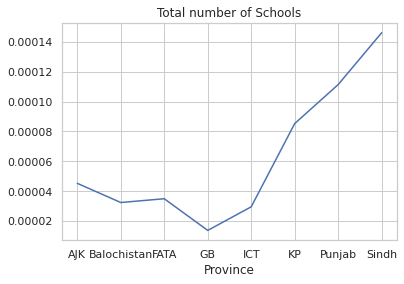

In [46]:
data.groupby('Province')['Total number of schools'].mean().plot()
plt.title('Total number of Schools')
plt.show()


Sindh has the highest number of schools

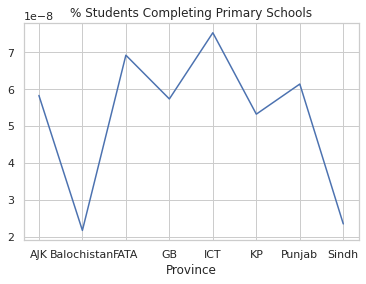

In [47]:
data.groupby('Province')['% Complete Primary Schools'].mean().plot()
plt.title('% Students Completing Primary Schools')
plt.show()


Despite the fact that Sindh has the highest number of schools, many students dont complete Primary level education

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


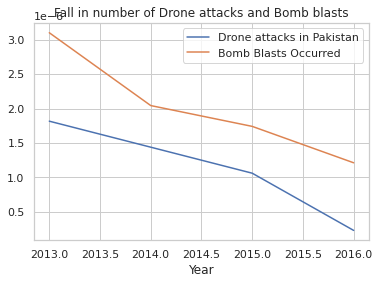

In [48]:
data.groupby('Year')['Drone attacks in Pakistan','Bomb Blasts Occurred'].mean().plot()
plt.title('Fall in number of Drone attacks and Bomb blasts')
plt.show()


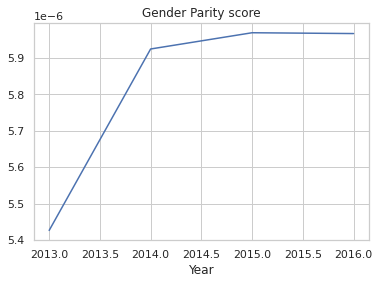

In [49]:
data.groupby('Year')['Gender parity score'].mean().plot()
plt.title('Gender Parity score')
plt.show()

Gender parity score didnot increase as much as it did before since the year 2014

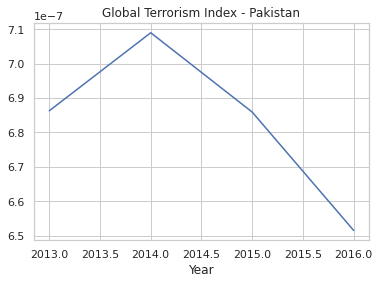

In [50]:
data.groupby('Year')['Global Terrorism Index - Pakistan'].mean().plot()
plt.title('Global Terrorism Index - Pakistan')
plt.show()

A fall in Globat Terrorism Index is observed from 2014

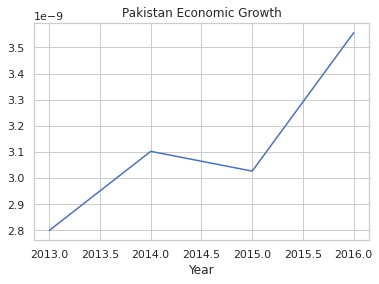

In [51]:
data.groupby('Year')['Pakistan Economic Growth'].mean().plot()
plt.title('Pakistan Economic Growth')
plt.show()

A rise can be seen in Pakistan Economic growth after 2014. 2014 is a promising year as depicted by our data. From 2014, the index of global terrorism of pakistan started to fall. The drone and terrorist attakcs reduced by a great factor. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


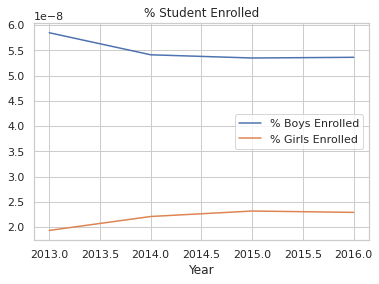

In [52]:
data.groupby('Year')['% Boys Enrolled','% Girls Enrolled'].mean().plot()
plt.title('% Student Enrolled')
plt.show()

After 2014, a rise in female enrollment can be observed

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


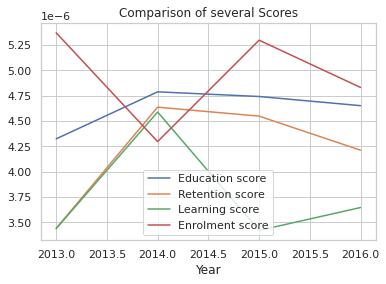

In [53]:
data.groupby('Year')['Education score','Retention score', 'Learning score','Enrolment score'].mean().plot()
plt.title('Comparison of several Scores')
plt.show()

This is an interesting graph, it shows in a steep drop in learning score after 2014 but a high rise in enrolment score. On the other hand, both the Education score and retention score starts to decrease after 2014. As it can be seen, in the 2014, the retention and education score started to dcrease which automatically resulted in fall of learning score as seen above